In [4]:
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [5]:
with open('./ablation_metrics/1B_ablate.pickle', 'rb') as f:
    metrics1b = pickle.load(f)

with open('./ablation_metrics/1C_ablate.pickle', 'rb') as f:
    metrics1c = pickle.load(f)

with open('./ablation_metrics/2A_ablate.pickle', 'rb') as f:
    metrics2a = pickle.load(f)
with open('./ablation_metrics/2B_ablate.pickle', 'rb') as f:
    metrics2b = pickle.load(f)

with open('./ablation_metrics/1B_ablate_few_shot.pickle', 'rb') as f:
    fs1b = pickle.load(f)
with open('./ablation_metrics/1C_ablate_few_shot.pickle', 'rb') as f:
    fs1c = pickle.load(f)

In [6]:
metrics1c.pop('last')
metrics1b.pop('last')

{'MRR': 0.4445753968253969,
 'MAP': 0.2944284411884412,
 'P@1': 0.324,
 'P@3': 0.30066666666666664,
 'P@5': 0.2881,
 'P@15': 0.28752470584970585,
 'EnrichCorrectedMRR': 0.18612556144341286,
 'EnrichOriginalMRR': 0.15209647736263915,
 'R@1': 0.07990581224331222,
 'R@5': 0.2600812565773244,
 'R@10': 0.2874195872080463}

In [7]:
metrics1b['0'] = {'MRR': 0.014668}
metrics1c['0'] = {'MRR': 0.020819}
metrics2a['0'] = {'MRR': 0.412815}
metrics2b['0'] = {'MRR': 0.420314}


sota_1b = 0.2514
sota_1c = 0.3756
sota_2a = 0.64
sota_2b = 0.7724

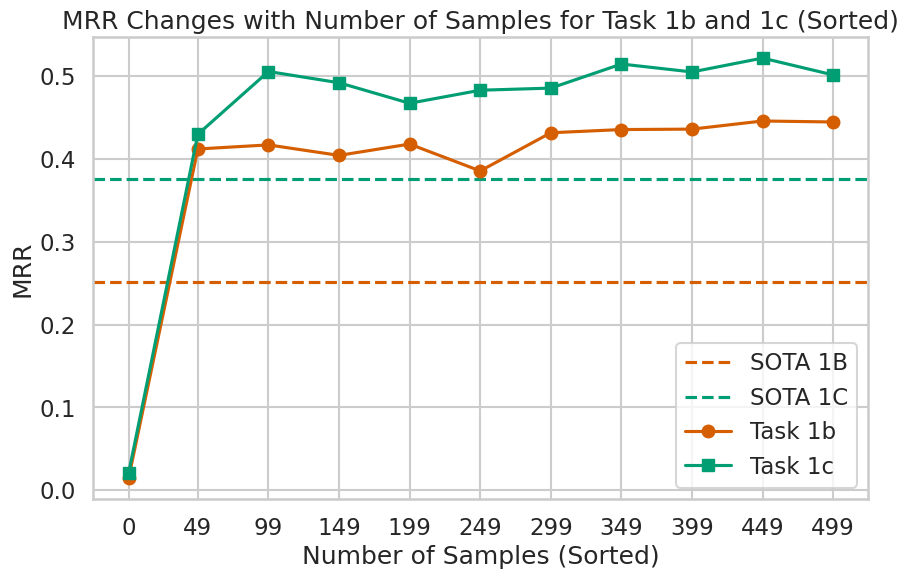

In [9]:
samples_sorted1 = sorted([int(sample) for sample in metrics1b.keys()])  # Sort sample sizes
mrr_values_1b_sorted = [metrics1b[str(sample)]['MRR'] for sample in samples_sorted1]
mrr_values_1c_sorted = [metrics1c[str(sample)]['MRR'] for sample in samples_sorted1]

# Plotting with sorted values
plt.figure(figsize=(10, 6))

plt.axhline(y=sota_1b, color='r', linestyle='--', label='SOTA 1B')
plt.axhline(y=sota_1c, color='g', linestyle='--', label='SOTA 1C')

plt.plot(samples_sorted1, mrr_values_1b_sorted, label='Task 1b', marker='o', color='r')
plt.plot(samples_sorted1, mrr_values_1c_sorted, label='Task 1c', marker='s', color='g')
plt.xlabel('Number of Samples (Sorted)')
plt.ylabel('MRR')
plt.title('MRR Changes with Number of Samples for Task 1b and 1c (Sorted)')
plt.legend()
plt.grid(True)
plt.xticks(samples_sorted1)  # Ensure x-ticks are sorted
plt.show()

# 1 - 2 - 5 - 15 - 30 - 50

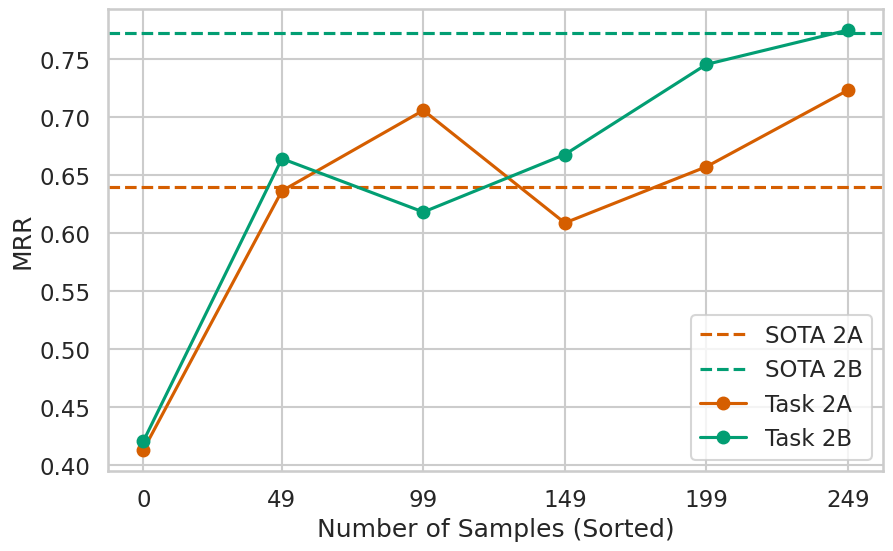

In [10]:
samples_sorted2 = sorted([int(sample) for sample in metrics2a.keys()])  # Sort sample sizes
mrr_values_2a_sorted = [metrics2a[str(sample)]['MRR'] for sample in samples_sorted2]
mrr_values_2b_sorted = [metrics2b[str(sample)]['MRR'] for sample in samples_sorted2]


# Plotting with sorted values
plt.figure(figsize=(10, 6))

plt.axhline(y=sota_2a, color='r', linestyle='--', label='SOTA 2A')
plt.axhline(y=sota_2b, color='g', linestyle='--', label='SOTA 2B')


plt.plot(samples_sorted2, mrr_values_2a_sorted, label='Task 2A', marker='o', color='r')
plt.plot(samples_sorted2, mrr_values_2b_sorted, label='Task 2B', marker='o', color='g')
plt.xlabel('Number of Samples (Sorted)')
plt.ylabel('MRR')
plt.legend()
plt.grid(True)
plt.xticks(samples_sorted2)  # Ensure x-ticks are sorted
plt.show()

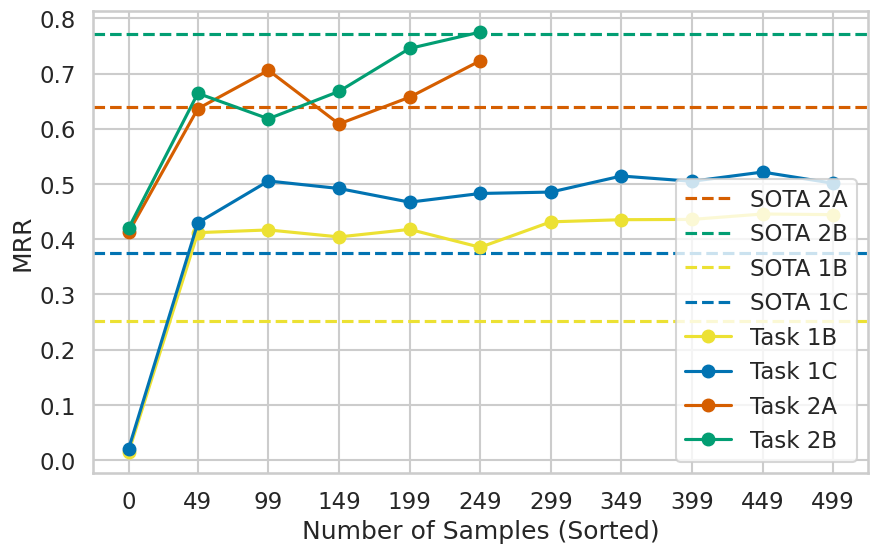

In [11]:
# samples_sorted2 = sorted([int(sample) for sample in metrics2a.keys()])  # Sort sample sizes
# mrr_values_2a_sorted = [metrics2a[str(sample)]['MRR'] for sample in samples_sorted2]
# mrr_values_2b_sorted = [metrics2b[str(sample)]['MRR'] for sample in samples_sorted2]

sns.set_style("whitegrid")
# Plotting with sorted values
plt.figure(figsize=(10, 6))

plt.axhline(y=sota_2a, color='r', linestyle='--', label='SOTA 2A')
plt.axhline(y=sota_2b, color='g', linestyle='--', label='SOTA 2B')
plt.axhline(y=sota_1b, color='y', linestyle='--', label='SOTA 1B')
plt.axhline(y=sota_1c, color='b', linestyle='--', label='SOTA 1C')

plt.plot(samples_sorted1, mrr_values_1b_sorted, label='Task 1B', marker='o', color='y')
plt.plot(samples_sorted1, mrr_values_1c_sorted, label='Task 1C', marker='o', color='b')

plt.plot(samples_sorted2, mrr_values_2a_sorted, label='Task 2A', marker='o', color='r')
plt.plot(samples_sorted2, mrr_values_2b_sorted, label='Task 2B', marker='o', color='g')

plt.xlabel('Number of Samples (Sorted)')
plt.ylabel('MRR')
plt.legend()
plt.grid(True)
plt.xticks(samples_sorted1)  # Ensure x-ticks are sorted
plt.show()

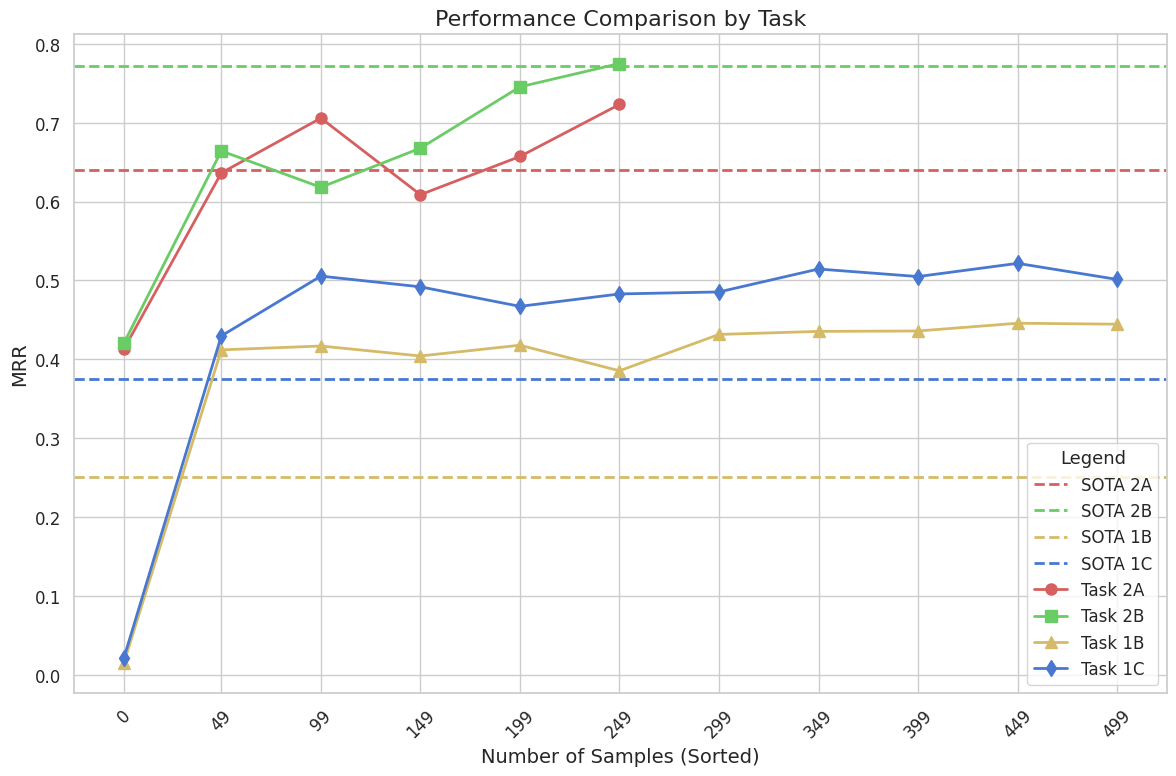

In [12]:
# Set the Seaborn style for better aesthetics
sns.set(style="whitegrid", palette="muted", font_scale=1.2)

# Create a larger plot
plt.figure(figsize=(12, 8))

# State of the Art (SOTA) lines with improved readability
plt.axhline(y=sota_2a, color='r', linestyle='--', label='SOTA 2A', linewidth=2)
plt.axhline(y=sota_2b, color='g', linestyle='--', label='SOTA 2B', linewidth=2)
plt.axhline(y=sota_1b, color='y', linestyle='--', label='SOTA 1B', linewidth=2)
plt.axhline(y=sota_1c, color='b', linestyle='--', label='SOTA 1C', linewidth=2)

# Plot each task with a distinct marker and line style for clarity
plt.plot(samples_sorted2, mrr_values_2a_sorted, label='Task 2A', marker='o', linestyle='-', color='r', markersize=8, linewidth=2)
plt.plot(samples_sorted2, mrr_values_2b_sorted, label='Task 2B', marker='s', linestyle='-', color='g', markersize=8, linewidth=2)
plt.plot(samples_sorted1, mrr_values_1b_sorted, label='Task 1B', marker='^', linestyle='-', color='y', markersize=8, linewidth=2)
plt.plot(samples_sorted1, mrr_values_1c_sorted, label='Task 1C', marker='d', linestyle='-', color='b', markersize=8, linewidth=2)

# Enhancing the labels and title
plt.xlabel('Number of Samples (Sorted)', fontsize=14)
plt.ylabel('MRR', fontsize=14)
plt.title('Performance Comparison by Task', fontsize=16)

# Improving the legend
plt.legend(title='Legend', title_fontsize='13', fontsize='12', loc='best')

# Customize the tick parameters for readability
plt.xticks(samples_sorted1, fontsize=12, rotation=45)  # Adjust rotation if labels overlap
plt.yticks(fontsize=12)

# Optionally, tighten the layout to ensure everything fits without clipping
plt.tight_layout()

# Show the plot
plt.show()

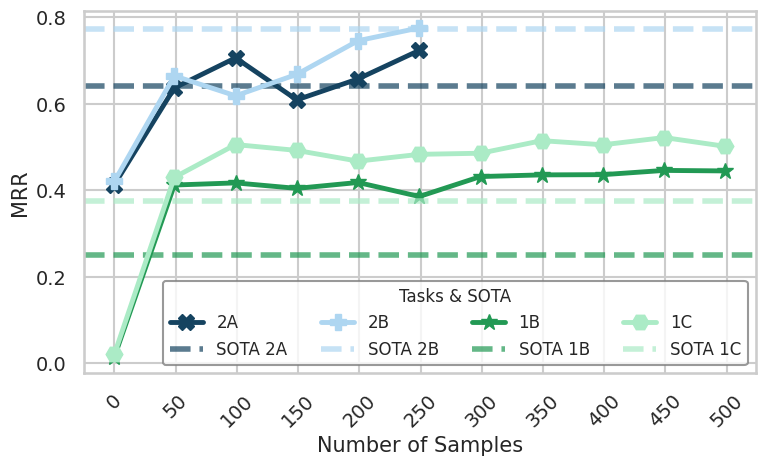

In [22]:
sns.set_theme(style="whitegrid", context="talk", palette="colorblind")

# Define a custom color palette for tasks and corresponding SOTA lines
# colors = {
#     'Task 2A': "#3498db",
#     'Task 2B': "#e74c3c",
#     'Task 1B': "#f39c12",  # Dark orange for better visibility
#     'Task 1C': "#1abc9c"   # Teal for distinct visibility
# }
colors = {
    '2A': "#154360",  # Deep Blue
    '2B': "#AED6F1",  # Very Light Blue
    '1B': "#229954",  # Dark Green
    '1C': "#ABEBC6"   # Light Green
}
sns.set_palette(sns.color_palette(list(colors.values())))

# Create the plot with adjusted aesthetics
plt.figure(figsize=(8, 5))

# Plot tasks with matching SOTA lines
for task, color in colors.items():
    if task == '2A':
        plt.plot(samples_sorted2, mrr_values_2a_sorted, label=task, marker='X', linestyle='-', linewidth=3.5, markersize=12, color=color)
        plt.axhline(y=sota_2a, color=color, linestyle='--', label=f'SOTA {task}', linewidth=4, alpha=0.7)
    elif task == '2B':
        plt.plot(samples_sorted2, mrr_values_2b_sorted, label=task, marker='P', linestyle='-', linewidth=3.5, markersize=12, color=color)
        plt.axhline(y=sota_2b, color=color, linestyle='--', label=f'SOTA {task}', linewidth=4, alpha=0.7)
    elif task == '1B':
        plt.plot(samples_sorted1, mrr_values_1b_sorted, label=task, marker='*', linestyle='-', linewidth=3.5, markersize=12, color=color)
        plt.axhline(y=sota_1b, color=color, linestyle='--', label=f'SOTA {task}', linewidth=4, alpha=0.7)
    elif task == '1C':
        plt.plot(samples_sorted1, mrr_values_1c_sorted, label=task, marker='H', linestyle='-', linewidth=3.5, markersize=12, color=color)
        plt.axhline(y=sota_1c, color=color, linestyle='--', label=f'SOTA {task}', linewidth=4, alpha=0.7)

# Customizing the plot further for clarity and aesthetics
plt.xlabel('Number of Samples', fontsize=15)
plt.ylabel('MRR', fontsize=15)
#plt.title('Performance Comparison by Task and Corresponding SOTA', fontsize=18, pad=20)

# Adjusting ticks for better readability
ticks = np.unique(samples_sorted1 + samples_sorted2)
ticks[1:] += 1
plt.xticks(ticks, rotation=45, fontsize=14)
plt.yticks(fontsize=14)
#plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
plt.grid(True)


# Improving the legend to clearly differentiate tasks and SOTA benchmarks
plt.legend(title='Tasks & SOTA', title_fontsize='12', fontsize='12', loc='best', frameon=True, edgecolor='gray', ncol=4)

# Ensuring the layout is tight so everything fits well
plt.tight_layout()
plt.savefig('figs/ablation_ft.pdf', dpi=1000)
# Displaying the enhanced and intuitive plot
plt.show()

In [18]:
samples_sorted_f

[1, 2, 5, 15, 30, 50]

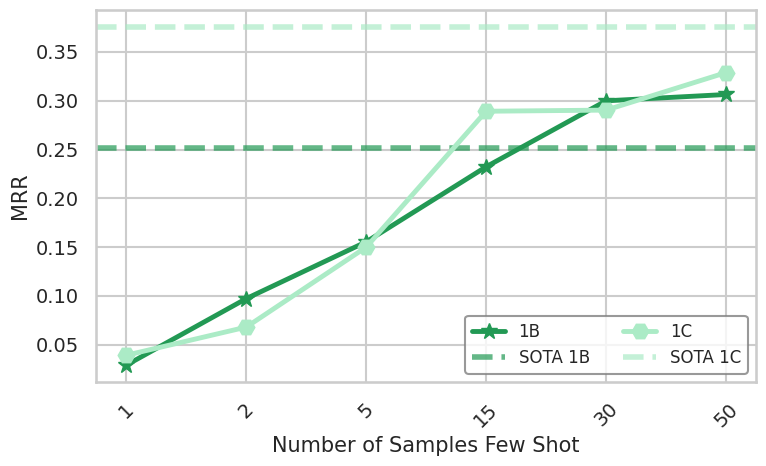

In [21]:
samples_sorted_f = sorted([int(sample) for sample in fs1b.keys()])  # Sort sample sizes
mrr_values_1b_fs = [fs1b[sample]['MRR'] for sample in samples_sorted_f]
mrr_values_1c_fs = [fs1c[sample]['MRR'] for sample in samples_sorted_f]

a = np.arange(len(samples_sorted_f))
# Plotting with sorted values
plt.figure(figsize=(8, 5))
plt.plot(a, mrr_values_1b_fs, label='1B', marker='*', linestyle='-', linewidth=3.5, markersize=12, color='#229954')
plt.axhline(y=sota_1b, color='#229954', linestyle='--', label='SOTA 1B', linewidth=4, alpha=0.7)

plt.plot(a, mrr_values_1c_fs, label='1C', marker='H', linestyle='-', linewidth=3.5, markersize=12, color='#ABEBC6')
plt.axhline(y=sota_1c, color='#ABEBC6', linestyle='--', label='SOTA 1C', linewidth=4, alpha=0.7)

plt.xlabel('Number of Samples Few Shot', fontsize=15)
plt.ylabel('MRR', fontsize=15)
plt.legend(title_fontsize='12', fontsize='12', loc='best', frameon=True, edgecolor='gray', ncol=2)
plt.grid(True)
plt.xticks(a, rotation=45, fontsize=14, labels=samples_sorted_f)  # Ensure x-ticks are sorted
plt.yticks(fontsize=14)
plt.tight_layout()

plt.savefig('figs/ablation_few_shot.pdf', dpi=1000)
plt.show()

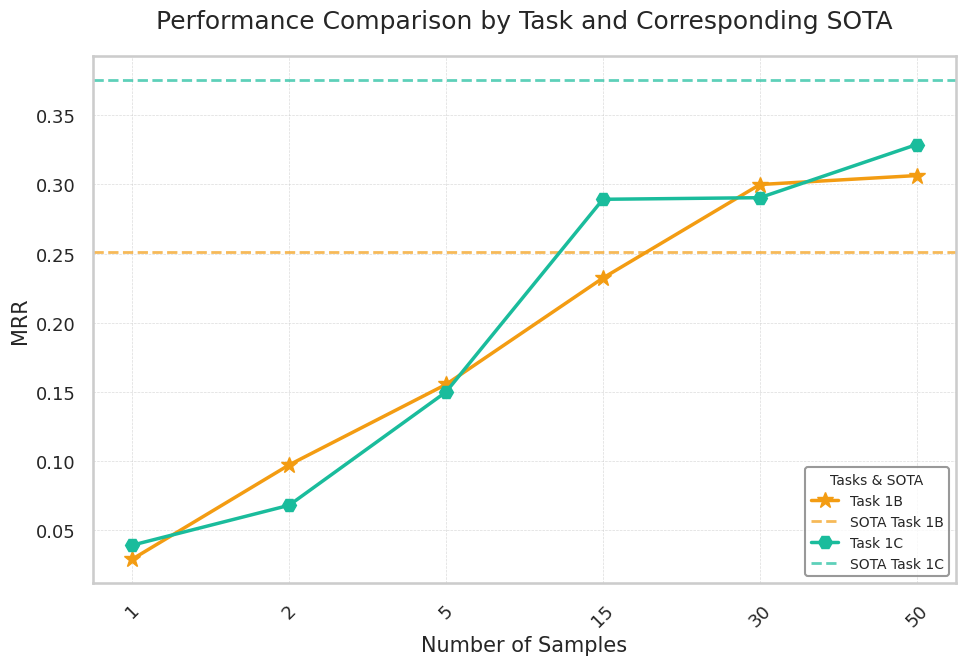

In [45]:
samples_sorted_f = np.array(samples_sorted_f).astype(str)

sns.set_theme(style="whitegrid", context="talk", palette="colorblind")

# Define a custom color palette for tasks and corresponding SOTA lines
colors = {
    'Task 1B': "#f39c12",  # Dark orange for better visibility
    'Task 1C': "#1abc9c"   # Teal for distinct visibility
}
sns.set_palette(sns.color_palette(list(colors.values())))

# Create the plot with adjusted aesthetics
plt.figure(figsize=(10, 7))

# Plot tasks with matching SOTA lines
for task, color in colors.items():
    if task == 'Task 1B':
        plt.plot(samples_sorted_f, mrr_values_1b_fs, label=task, marker='*', linestyle='-', linewidth=2.5, markersize=12, color=color)
        plt.axhline(y=sota_1b, color=color, linestyle='--', label=f'SOTA {task}', linewidth=2, alpha=0.7)
    elif task == 'Task 1C':
        plt.plot(samples_sorted_f, mrr_values_1c_fs, label=task, marker='H', linestyle='-', linewidth=2.5, markersize=10, color=color)
        plt.axhline(y=sota_1c, color=color, linestyle='--', label=f'SOTA {task}', linewidth=2, alpha=0.7)

# Customizing the plot further for clarity and aesthetics
plt.xlabel('Number of Samples', fontsize=15)
plt.ylabel('MRR', fontsize=15)
plt.title('Performance Comparison by Task and Corresponding SOTA', fontsize=18, pad=20)

# Adjusting ticks for better readability
plt.xticks(np.unique(samples_sorted_f), rotation=45, fontsize=13)
plt.yticks(fontsize=13)
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Improving the legend to clearly differentiate tasks and SOTA benchmarks
plt.legend(title='Tasks & SOTA', title_fontsize='10', fontsize='10', loc='best', frameon=True, edgecolor='gray')

# Ensuring the layout is tight so everything fits well
plt.tight_layout()

# Displaying the enhanced and intuitive plot
plt.show()

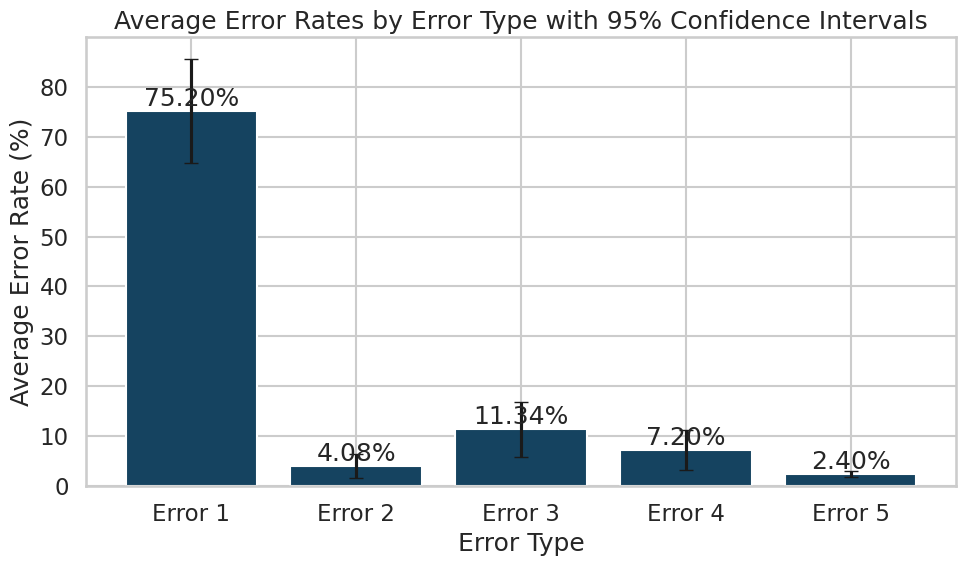

In [20]:
# Given data
data = {
    "1A: English": [72.49, 2.61, 9.44, 15.46, 0.00],
    "2A: Medical": [93.75, 0.00, 1.25, 5.00, 0.00],
    "2B: Music": [100.0, 0.0, 0.0, 0.0, 0.0],
    "1B: Italian": [54.69, 10.03, 27.83, 7.44, 0.00],
    "1C: Spanish": [49.08, 10.62, 12.09, 18.21, 0.00],
    "MAG-CS": [66.48, 5.40, 13.21, 10.94, 3.98],
    "MAG-PSY": [85.43, 1.40, 11.20, 0.70, 1.26],
    "Noun": [81.45, 4.10, 6.05, 6.64, 1.76],
    "Verb": [73.39, 2.58, 21.03, 0.43, 2.58]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Calculate the average for each row
# For the last row (Error 5), calculate average excluding zero values
df["Average"] = df.apply(lambda x: x[x > 0].mean() if x.name == 4 else x.mean(), axis=1)

# Calculating standard deviation for confidence intervals
df["Std"] = df.apply(lambda x: x[x > 0].std() if x.name == 4 else x.std(), axis=1)

# Number of samples for each row
n = df.count(axis=1) - 2  # Exclude 'Average' and 'Std' from count
# Confidence interval calculation assuming a normal distribution (95% confidence level)
z = 1.96  # Z-score for 95% confidence
df["CI_lower"] = df["Average"] - z * (df["Std"] / n**0.5)
df["CI_upper"] = df["Average"] + z * (df["Std"] / n**0.5)

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(df.index, df["Average"], yerr=[df["Average"]-df["CI_lower"], df["CI_upper"]-df["Average"]], capsize=5)

# Adding the value above each bar
for bar, avg in zip(bars, df["Average"]):
    plt.text(bar.get_x() + bar.get_width() / 2, avg, f"{avg:.2f}%", ha='center', va='bottom')

plt.title("Average Error Rates by Error Type with 95% Confidence Intervals")
plt.xlabel("Error Type")
plt.ylabel("Average Error Rate (%)")
plt.xticks(df.index, ["Error 1", "Error 2", "Error 3", "Error 4", "Error 5"])
plt.grid(True)
plt.tight_layout()
plt.show()


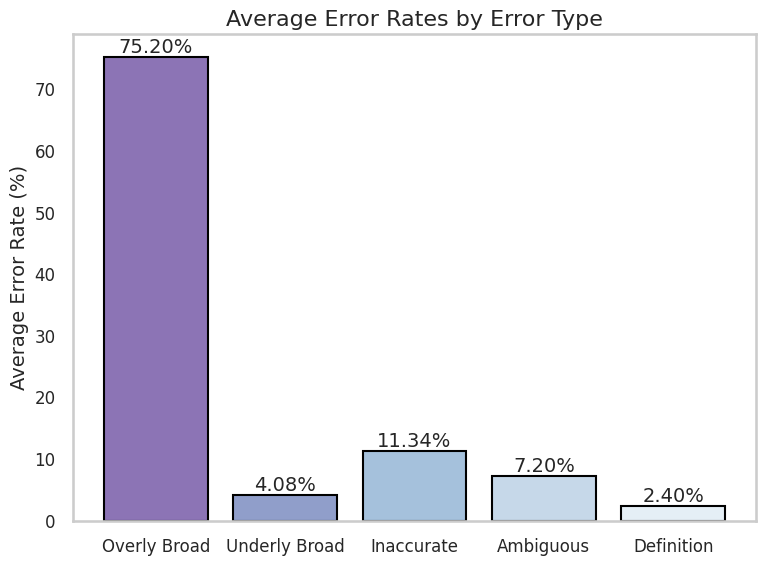

In [73]:
sns.set_theme(style="whitegrid", context="talk", palette="colorblind")


error_nums = ["Error 1", "Error 2", "Error 3", "Error 4", "Error 5"]
error_names = ["Overly Broad", "Underly Broad", "Inaccurate", "Ambiguous", "Definition"]
#  Prettifying the plot
plt.figure(figsize=(8, 6))
colors = plt.cm.BuPu(np.linspace(0.6, 0.1, 5))
#colors = plt.cm.viridis(0.4)
bars = plt.bar(df.index, df["Average"], #yerr=[df["Average"]-df["CI_lower"], df["CI_upper"]-df["Average"]],
               capsize=5, color=colors, edgecolor='black')

# Adding the value above each bar but slightly higher to avoid overlap with the confidence interval
for bar, avg in zip(bars, df["Average"]):
    plt.text(bar.get_x() + bar.get_width() / 2, avg, f"{avg:.2f}%", ha='center', va='bottom', fontsize=14)

plt.title("Average Error Rates by Error Type", fontsize=16)
#plt.xlabel("Error Type", fontsize=14)
plt.ylabel("Average Error Rate (%)", fontsize=14)
plt.xticks(df.index, error_names, fontsize=12)
plt.yticks( fontsize=12)


# Adding grid lines for better readability
# plt.grid(True, which='major', linestyle='--', linewidth=0.05, color='grey')
# plt.grid(True, which='minor', linestyle=':', linewidth=0.05, color='lightgrey')
plt.grid(False)
# # Setting the background color
# plt.gca().set_facecolor('whitesmoke')
# plt.gcf().set_facecolor('floralwhite')

# Tight layout for better spacing
plt.tight_layout()
plt.savefig('./figs/error_type.pdf')
# Show the plot
plt.show()
